In [1]:
# Исследование ошибки по эталону.

In [2]:
# Шаг 1 - зависимости
import attractor
from attractor import Attractor, compare
import matplotlib.pyplot as plt
import numpy as np
import copy

In [3]:
# Шаг 2 - функция возвращающая примую найденную методом наименьших квадратов
# Роль ошибки играет коэф наклона m (Далее он называется K). Инвариант должен быть неизменен, потому в теории K == 0. Это позволяет рассматривать эксперементальное K != 0 как значение ошибки
def lse(points):
    x = points[1]
    y = points[0]
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return m,c


In [4]:
# РАБОТА С ЭТАЛОНОМ

In [134]:
# Шаг 3 - Параметры эталона и другие 
diff_arr = [[],[]] # Массив точек
inv = 5 #  Номер инварианта для оценки метода. В работе используется 5
eth_method = 'ABM5'  # Исследуемый метод. В работе выбран метод ABM5
rg = 10.0  # Расстояние, на котором производится исследование. Его увеличение пропорционально увеличит время.
eth_step = 0.00001
eth_num_steps = int(rg/eth_step)
print(eth_num_steps)

999999


In [6]:
# Шаг 4 - Расчет по эталону
eth_AL1 = Attractor(step=eth_step, num_steps=eth_num_steps)
eth_AL1.set_invariant_params(inv)
eth_AL1.call_method(eth_method)
eth_calls = eth_AL1.get_counter()
print("calls_f: ", eth_calls)
eth_points = eth_AL1.getPoints()

123456789
calls_f:  23999916


In [7]:
# Шаг 5 - Обрезаем трети с концов эталона
l = int(eth_points.shape[1] * (1.0 / 3.0))
eth_points = eth_points[:, l:-l]
print(eth_points.shape)

(4, 333334)


In [8]:
# РАБОТА С СРАВНИМВАЕМЫМ

In [135]:
# Шаг 5 - выбор исследуемого метода
# methods = ["EUL1","MIDP2", "RK4", "AB4", "AM4", "ABM5"]
method = 'RK4'  # Исследуемый метод

In [158]:
# Шаг 6 - Параметры исследуемого метода
num_steps = 4600
# step = 0.0001
# num_steps = int(rg/step)
step = rg/num_steps
print(step)


0.002173913043478261


In [159]:
# Шаг 7 - Расчет по исследуемому методу
cmp_AL1 = Attractor(step=step, num_steps=num_steps)
cmp_AL1.set_invariant_params(inv)
cmp_AL1.call_method(method)
cmp_calls = cmp_AL1.get_counter()
print("calls_f: ", cmp_calls)
cmp_points = cmp_AL1.getPoints()

0123456789
calls_f:  18400


In [160]:
# Шаг 8 - Обрезаем трети с концов исслдуемого отрезка
l = int(cmp_points.shape[1] * (1.0 / 3.0))
cmp_points = cmp_points[:, l:-l]
print(cmp_points.shape)

(4, 1535)


In [161]:
# Шаг 9 - Считаем разницу между эталоном и исследуемым методом
# Если у исследуемого метода шагов меньше следует взять его временную шкалу (adopt_time_scale = True), хотя е принципиально
err = compare(eth_points,cmp_points, adopt_time_scale = True)

In [162]:
# Шаг 9 - Обрезаем пятые части с концов точек ошибки
l = int(err.shape[1] * (1.0 / 5.0))
err = err[:, l:-l]
print(err.shape)

(2, 921)


In [163]:
# Шаг 9 - Параметры ошибки
M = np.mean(err[0])
print(cmp_calls)
print(M)
print(np.log10(M))

18400
9.41312784892431e-10
-9.02626604269248


In [164]:
# Шаг 10 - Добавляем новую точку
diff_arr[0].append(cmp_calls)
diff_arr[1].append(M)

In [165]:
# Повторить шаги 5-10 пока не наберется достаточно точек

[14000, 16000, 18000, 18400]
[2.802755600938152e-09, 1.6360773016769809e-09, 1.0282412019831423e-09, 9.41312784892431e-10]


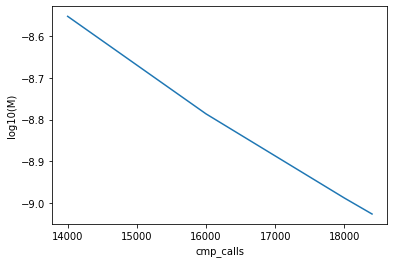

In [166]:
# Вывод графика

print(diff_arr[0])
print(diff_arr[1])
plt.xlabel("cmp_calls")
plt.ylabel("log10(M)")
plt.plot(np.abs(diff_arr[0]),np.log10(np.abs(diff_arr[1])))

In [ ]:
# plt.xlabel("t")
# plt.ylabel("err")
# plt.plot(err[1],err[0],lw=0.5)

In [ ]:
diff_arr